##  Image Thresholding

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt



In [59]:
# readd the image
img = cv2.imread('road.png',0)


In [60]:
# Adaptive thresholding

th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,269,4)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,691,4)



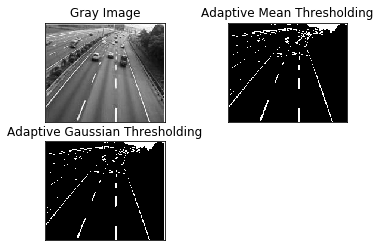

In [61]:
titles = ['Gray Image','Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img,th2,th3]

for i in range(3):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

(166, 201, 3)


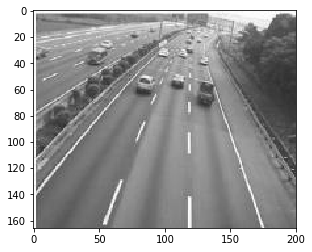

In [62]:

# another approach using mask and thresholding
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img);
print(img.shape)

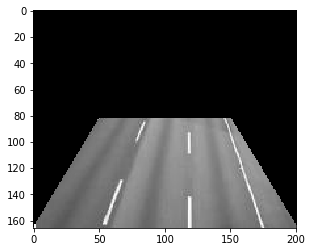

In [63]:
import numpy as np

height = img.shape[0]
width = img.shape[1]

# region of interest
region_of_interest_vertices = [
    
    (0,height),
    (50,82),
    (150,82),
    (width,height)
]


def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    channel_count = img.shape[2]
    match_mask_color = (255,)* channel_count
    cv2.fillPoly(mask, vertices,match_mask_color)
    masked_image =cv2.bitwise_and(img,mask)
    return masked_image

cropped_image = region_of_interest(img,np.array([region_of_interest_vertices], np.int32,))
plt.imshow(cropped_image)

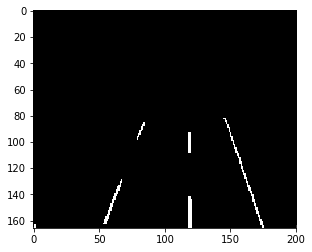

In [64]:
ret,thresh1 = cv2.threshold(cropped_image,187,255,cv2.THRESH_BINARY)
plt.imshow(thresh1)